In [1]:
import json

captions = [{"file_name": "Automated Factory1.jpg", "text": "in a Automated factory"},
            {"file_name": "Automated Factory2.jpg", "text": "in a Automated factory"},
            {"file_name": "Automated Factory3.jpg", "text": "in a Automated factory"},
            {"file_name": "Automated Factory4.jpg", "text": "in a Automated factory"},
            {"file_name": "Automated Factory5.jpg", "text": "in a Automated factory"},
            {"file_name": "Automated Factory6.jpg", "text": "in a Automated factory"},
            {"file_name": "Automated Factory7.jpg", "text": "in a Automated factory"},
            {"file_name": "Automated Factory8.jpg", "text": "in a Automated factory"},
            {"file_name": "Automated Factory9.jpg", "text": "in a Automated factory"},
            {"file_name": "Automated Factory10.jpg", "text": "in a Automated factory"},
            {"file_name": "chemical1.jpg", "text": "in a Chemical factory"},
            {"file_name": "chemical2.jpg", "text": "in a Chemical factory"},
            {"file_name": "chemical3.jpg", "text": "in a Chemical factory"},
            {"file_name": "chemical4.jpg", "text": "in a Chemical factory"},
            {"file_name": "chemical5.jpg", "text": "in a Chemical factory"},
            {"file_name": "chemical6.jpg", "text": "in a Chemical factory"},
            {"file_name": "chemical7.jpg", "text": "in a Chemical factory"},
            {"file_name": "chemical8.jpg", "text": "in a Chemical factory"},
            {"file_name": "chemical9.jpg", "text": "in a Chemical factory"},
            {"file_name": "chemical10.jpg", "text": "in a Chemical factory"},
            {"file_name": "chemical10.jpg", "text": "in a Chemical factory"},
            {"file_name": "food factory1.jpg", "text": "in a food factory"},
            {"file_name": "food factory2.jpg", "text": "in a food factory"},
            {"file_name": "food factory3.jpg", "text": "in a food factory"},
            {"file_name": "food factory4.jpg", "text": "in a food factory"},
            {"file_name": "food factory5.jpg", "text": "in a food factory"},
            {"file_name": "food factory6.jpg", "text": "in a food factory"},
            {"file_name": "food factory7.jpg", "text": "in a food factory"},
            {"file_name": "food factory8.jpg", "text": "in a food factory"},
            {"file_name": "food factory9.jpg", "text": "in a food factory"},
            {"file_name": "food factory10.jpg", "text": "in a food factory"},
            {"file_name": "seafood1.jpg", "text": "in a seafood factory"},
            {"file_name": "seafood2.jpg", "text": "in a seafood factory"},
            {"file_name": "seafood3.jpg", "text": "in a seafood factory"},
            {"file_name": "seafood4.jpg", "text": "in a seafood factory"},
            {"file_name": "seafood5.jpg", "text": "in a seafood factory"},
            {"file_name": "seafood6.jpg", "text": "in a seafood factory"},
            {"file_name": "seafood7.jpg", "text": "in a seafood factory"},
            {"file_name": "seafood8.jpg", "text": "in a seafood factory"},
            {"file_name": "seafood9.jpg", "text": "in a seafood factory"},
            {"file_name": "seafood10.jpg", "text": "in a seafood factory"},
            {"file_name": "Water Plant1.jpg", "text": "in a water plant"},
            {"file_name": "Water Plant2.jpg", "text": "in a water plant"},
            {"file_name": "Water Plant3.jpg", "text": "in a water plant"},
            {"file_name": "Water Plant4.jpg", "text": "in a water plant"},
            {"file_name": "Water Plant5.jpg", "text": "in a water plant"},
            {"file_name": "Water Plant6.jpg", "text": "in a water plant"},
            {"file_name": "Water Plant7.jpg", "text": "in a water plant"},
            {"file_name": "Water Plant8.jpg", "text": "in a water plant"},
            {"file_name": "Water Plant9.jpg", "text": "in a water plant"},
            {"file_name": "Water Plant10.jpg", "text": "in a water plant"},]

# path to the folder containing the images
train_root = "C:/Users/zhc23013/Desktop/Safe Detection/images/train"

#root = "/content/drive/MyDrive/GenerativeImage2Text/Tutorial notebooks/Toy_dataset/"

# add metadata.jsonl file to this folder
with open(train_root + "metadata.jsonl", 'w') as f:
    for item in captions:
        f.write(json.dumps(item) + "\n")

In [2]:
# captions = [{"file_name": "Automated Factory20.jpg", "text": "in a Automated factory"},
#             {"file_name": "chemical20.jpg", "text": "in a Chemical factory"},
#             {"file_name": "food factory20.jpg", "text": "in a food factory"},
#             {"file_name": "Water Plant20.jpg", "text": "in a water plant"},
#             {"file_name": "seafood20.jpg", "text": "in a seafood factory"},
#             ]

# # path to the folder containing the images
# root = "C:/Users/zhc23013/Desktop/Safe Detection/test images/"
# #root = "/content/drive/MyDrive/GenerativeImage2Text/Tutorial notebooks/Toy_dataset/"

# # add metadata.jsonl file to this folder
# with open(root + "metadata.jsonl", 'w') as f:
#     for item in captions:
#         f.write(json.dumps(item) + "\n")

In [3]:
root = "C:/Users/zhc23013/Desktop/Safe Detection/images/"

In [4]:
from datasets import load_dataset 

train_dataset = load_dataset("imagefolder", data_dir=root, split="train")

c:\Users\zhc23013\AppData\Local\miniconda3\envs\yolov8\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
test_dataset = load_dataset("imagefolder", data_dir=root, split="test")

In [6]:
test_dataset[1]["text"]

'in a water plant'

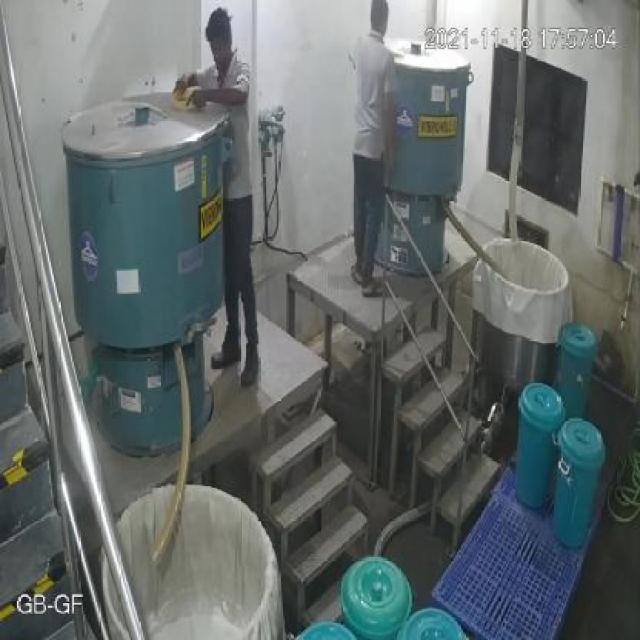

In [7]:
test_dataset[1]["image"]

In [8]:
train_dataset[0]["text"]

'in a Automated factory'

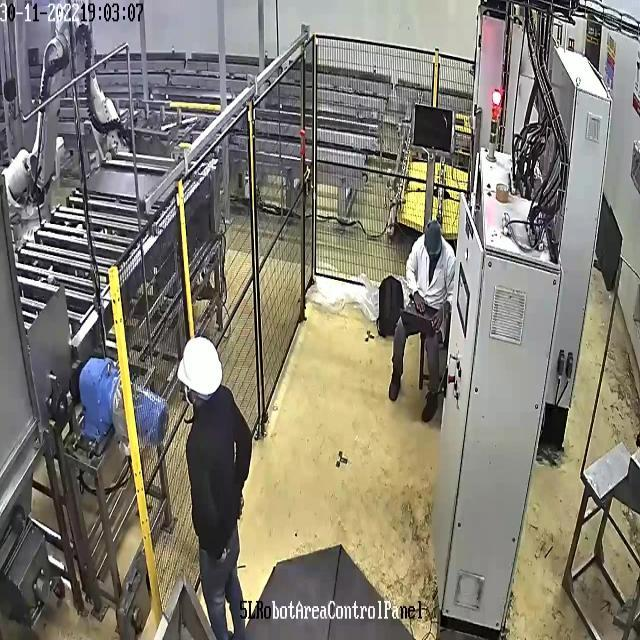

In [9]:
train_dataset[0]["image"]

In [10]:
from torch.utils.data import Dataset, DataLoader

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], text=item["text"], padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

In [11]:
from transformers import AutoProcessor, BlipForConditionalGeneration

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [12]:
train_dataset1 = ImageCaptioningDataset(train_dataset, processor)
train_dataloader = DataLoader(train_dataset1, shuffle=True, batch_size=2)

In [13]:
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(50):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)
    
    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Epoch: 0


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Loss: 13.196516990661621
Loss: 10.37143611907959
Loss: 10.282282829284668
Loss: 10.26082992553711
Loss: 10.23007583618164
Loss: 10.215137481689453
Loss: 10.185766220092773
Loss: 10.171500205993652
Loss: 10.154539108276367
Loss: 10.104300498962402
Loss: 9.781843185424805
Loss: 9.23443603515625
Loss: 8.784468650817871
Loss: 8.658530235290527
Loss: 8.470507621765137
Loss: 8.253690719604492
Loss: 8.045890808105469
Loss: 7.871058464050293
Loss: 7.71549654006958
Loss: 7.536153316497803
Loss: 7.389367580413818
Loss: 7.25679874420166
Loss: 7.102750301361084
Loss: 6.955310821533203
Loss: 6.814818859100342
Epoch: 1
Loss: 6.670186996459961
Loss: 6.523404598236084
Loss: 6.376025676727295
Loss: 6.236741542816162
Loss: 6.084712028503418
Loss: 5.9365410804748535
Loss: 5.802560329437256
Loss: 5.647869110107422
Loss: 5.5091447830200195
Loss: 5.361959934234619
Loss: 5.208138942718506
Loss: 5.0579752922058105
Loss: 4.918422698974609
Loss: 4.770486831665039
Loss: 4.618884563446045
Loss: 4.470273494720459


# Inference

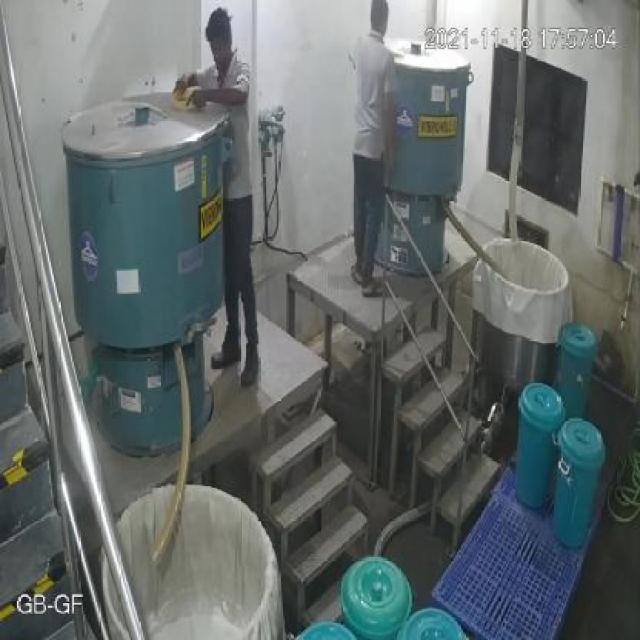

In [14]:
# load image
example = test_dataset[1]
image = example["image"]
image

In [15]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

in a water plant
